In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# SI Model

The Susceptible-Infected (SI) model is one of the simplest compartmental models. It assumes that individuals in the population are either susceptible (S) or infected (I). The infection spreads through contact between susceptible and infected individuals, with no recovery or immunity.

The dynamics are governed by the following reaction:
$$S + I \rightarrow_{\beta} 2I$$

Here, $\beta$ is the infection rate. The goal is to simulate the model using the Euler method and compare the results with the analytical solution:

### What is the Euler Method?

The Euler method is a numerical technique used to solve ordinary differential equations (ODEs). It approximates the solution by iteratively updating the state of the system using the following formula:

$$y_{n+1} = y_n + f(t_n, y_n) \cdot \Delta t$$

Where:
- $y_n$ is the current value of the variable being solved.
- $f(t_n, y_n)$ is the derivative of $y$ with respect to $t$ at the current time step.
- $\Delta t$ is the time step size.

In this model, the Euler method is used to approximate the changes in the susceptible ($S$) and infected ($I$) populations over discrete time steps.

The analytical solution for the SI model is given by:
$$I(t) = \frac{N I_0}{I_0 + S_0 e^{-\beta t}}$$

Parameters:
- $\beta = 0.3$: Infection rate
- $N=10^5$: Total population size
- $I_0=10$: Initial number of infected individuals
- $T_{final}=100$: Simulation time
- $dt=0.05$: Time step

In [29]:
def si_model(beta, N, I0, T_final, dt=1):
    """
    Function to simulate the SI model.

    Parameters:
        beta (float): Infection rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        steps (array): Array of time steps over time
    """
    S, I = [N - I0], [I0]
    steps = np.arange(0, T_final + dt, dt)
    for t in range(1, len(steps)):
        new_inf = beta * S[t-1] * I[t-1] / N * dt
        S.append(S[t-1] - new_inf)
        I.append(I[t-1] + new_inf)

    return np.array(S), np.array(I), np.array(steps)

def si_analytical_solution(beta, N, I0, t):
    return N * I0 / (I0 + (N - I0) * np.exp(-beta * t))

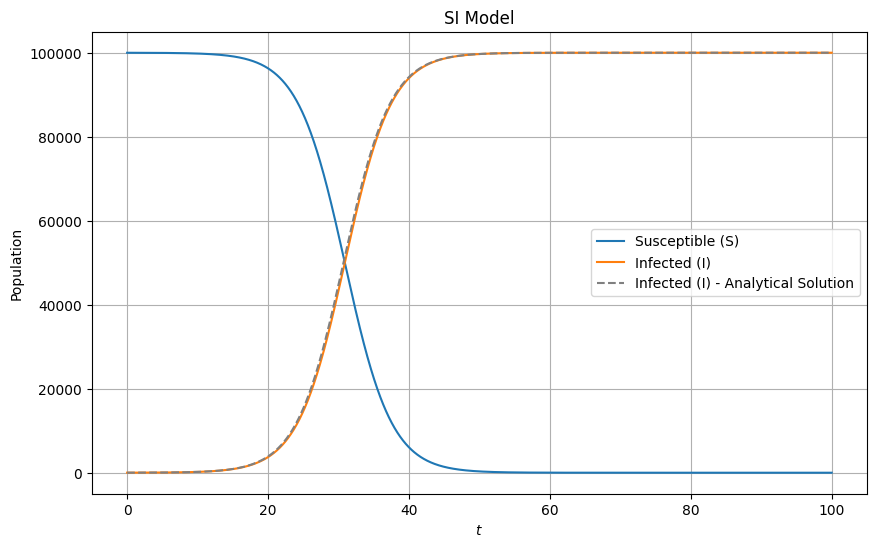

In [30]:
S, I, steps = si_model(beta=0.3, N=10**5, I0=10, T_final=100, dt=0.05)
I_solution = np.array([si_analytical_solution(beta=0.3, N=10**5, I0=10, t=t) for t in steps])

# plot
plt.figure(figsize=(10, 6))
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, I_solution, label='Infected (I) - Analytical Solution', color="grey", linestyle="--")

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SI Model')
plt.legend()
plt.grid(True)
plt.show()

## Exploring the Effect of Parameters in the SI Model

Let's investigate how the infection dynamics change when we vary the infection rate ($\beta$) and the initial number of infected individuals ($I_0$).

- **Varying $\beta$:** Higher $\beta$ means faster spread.
- **Varying $I_0$:** A larger initial infected population accelerates the outbreak.

We will plot both the numerical (Euler) and analytical solutions for each scenario, using the same style as before.

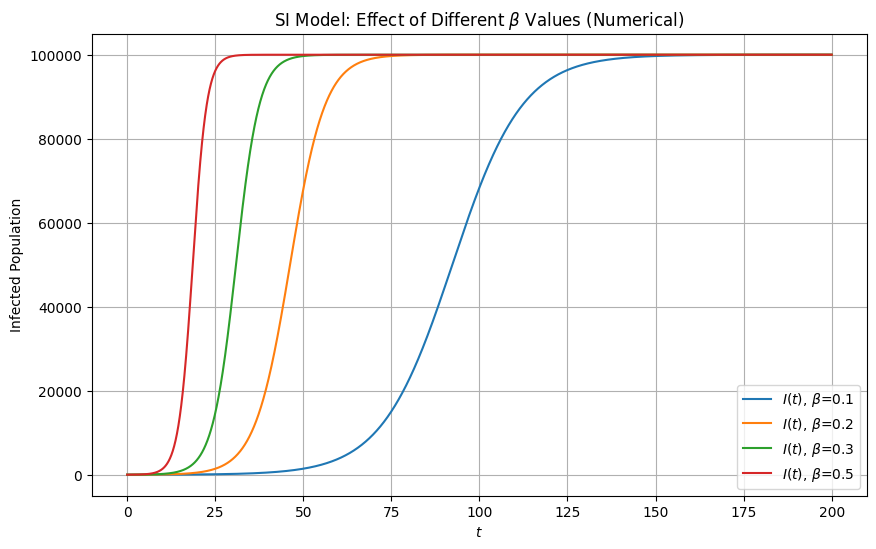

In [31]:
# Compare SI model for different beta values (numerical only)
betas = [0.1, 0.2, 0.3, 0.5]
N, I0, T_final, dt = 10**5, 10, 200, 0.05

plt.figure(figsize=(10, 6))
for beta in betas:
    S, I, steps = si_model(beta=beta, N=N, I0=I0, T_final=T_final, dt=dt)
    plt.plot(steps, I, label=f'$I(t)$, $\\beta$={beta}')

plt.xlabel('$t$')
plt.ylabel('Infected Population')
plt.title('SI Model: Effect of Different $\\beta$ Values (Numerical)')
plt.legend()
plt.grid(True)
plt.show()

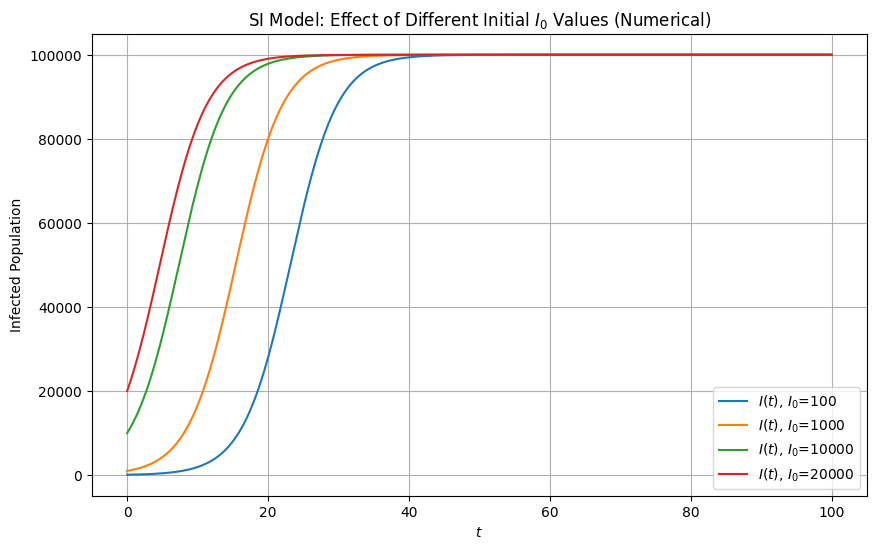

In [32]:
# Compare SI model for different initial infected I0 values (numerical only)
I0s = [100, 1000, 10000, 20000]
beta, N, T_final, dt = 0.3, 10**5, 100, 0.05

plt.figure(figsize=(10, 6))
for I0 in I0s:
    S, I, steps = si_model(beta=beta, N=N, I0=I0, T_final=T_final, dt=dt)
    plt.plot(steps, I, label=f'$I(t)$, $I_0$={I0}')

plt.xlabel('$t$')
plt.ylabel('Infected Population')
plt.title('SI Model: Effect of Different Initial $I_0$ Values (Numerical)')
plt.legend()
plt.grid(True)
plt.show()

# SIS Model

The Susceptible-Infected-Susceptible (SIS) model extends the SI model by introducing recovery. In this model, infected individuals can recover and become susceptible again. The dynamics are governed by:

$$S + I \rightarrow_{\beta} 2I$$
$$I \rightarrow_{\gamma} S$$

Here:
- $\beta$ is the infection rate.
- $\gamma$ is the recovery rate.

The analytical solution is given by:
$$I(t) = \frac{N (\beta - \gamma) I_0}{\beta I_0 + (\beta S_0 - \gamma N) e^{-\gamma (R_0 -1) t}}$$

Parameters:
- $\beta = 0.3$
- $\gamma = 0.1$
- $N=10^5$
- $I_0=10$
- $T_{final}=100$
- $dt=0.05$

In [33]:
def sis_model(beta, gamma, N, I0, T_final, dt=1):
    """
    Function to simulate the SIS model.

    Parameters:
        beta (float): Infection rate
        gamma (float): Recovery rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        steps (array): Array of time steps over time
    """
    S, I = [N - I0], [I0]
    steps = np.arange(0, T_final + dt, dt)
    for t in range(1, len(steps)):
        new_inf = beta * S[t-1] * I[t-1] / N * dt
        new_sus = gamma * I[t-1] * dt
        S.append(S[t-1] - new_inf + new_sus)
        I.append(I[t-1] + new_inf - new_sus)

    return np.array(S), np.array(I), np.array(steps)

def sis_analytical_solution(beta, gamma, N, I0, t):
    return (N * (beta - gamma) * I0) / (beta * I0 + (beta * (N - I0) - gamma * N) * np.exp(-gamma * (beta / gamma - 1) * t))

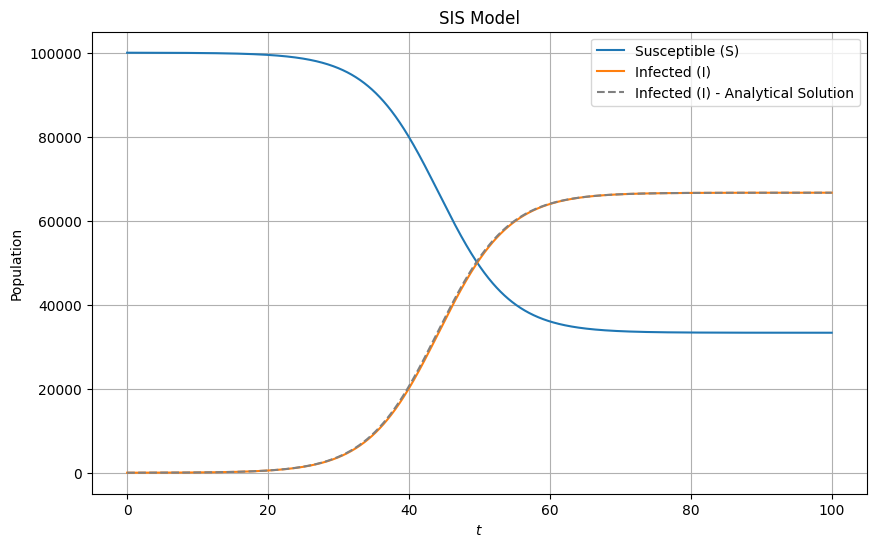

In [34]:
S, I, steps = sis_model(beta=0.3, gamma=0.1, N=10**5, I0=10, T_final=100, dt=0.05)
I_solution = np.array([sis_analytical_solution(beta=0.3, gamma=0.1, N=10**5, I0=10, t=t) for t in steps])

# plot
plt.figure(figsize=(10, 6))
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, I_solution, label='Infected (I) - Analytical Solution', color="grey", linestyle="--")

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIS Model')
plt.legend()
plt.grid(True)
plt.show()

# Equilibrium State of SIS Model

The equilibrium state of the SIS model refers to the point where the system reaches a steady state, meaning the number of susceptible ($S$) and infected ($I$) individuals no longer changes over time. At equilibrium, the rates of infection and recovery balance each other, and the system stabilizes.

The equilibrium fraction of infected individuals is given by:
$$I(\infty) = N \left(1 - \frac{1}{R_0}\right)$$

Where:
- $I(\infty)$ is the number of infected individuals at equilibrium.
- $R_0 = \frac{\beta}{\gamma}$ is the basic reproduction number, which represents the average number of secondary infections caused by one infected individual in a fully susceptible population.

### Implications of the Equilibrium State:
1. **Threshold Behavior:**
   - If $R_0 > 1$, the infection persists in the population, and a non-zero fraction of individuals remain infected at equilibrium.
   - If $R_0 \leq 1$, the infection dies out, and the equilibrium state corresponds to no infected individuals ($I(\infty) = 0$).

2. **Endemic State:**
   - For $R_0 > 1$, the infection becomes endemic, meaning it remains in the population at a constant level over time.

3. **Public Health Implications:**
   - The equilibrium state provides insights into the long-term behavior of the infection and helps determine the level of intervention required to control or eliminate the disease.
   - Reducing $R_0$ (e.g., through vaccination, reducing contact rates, or increasing recovery rates) can shift the system to a disease-free equilibrium.

This equilibrium analysis is crucial for understanding the dynamics of infectious diseases and designing effective control strategies.

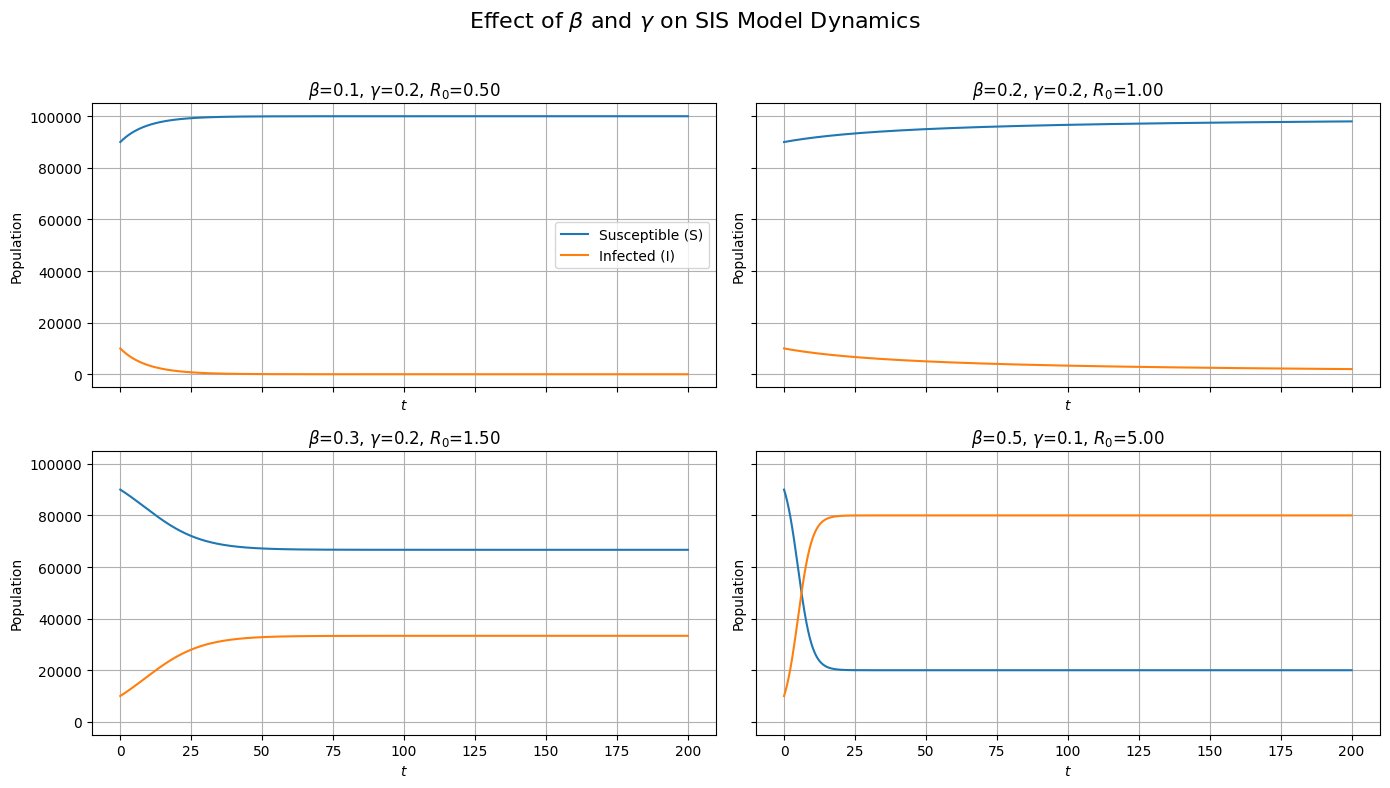

In [35]:
# - For R0 < 1: Infection dies out.
# - For R0 = 1: Threshold, infection barely persists.
# - For R0 > 1: Infection becomes endemic at a level that increases with R0.

# Explore effect of beta and gamma on SIS model dynamics with different R0 regimes
params = [
    (0.1, 0.2),   # R0 = 0.5, infection dies out
    (0.2, 0.2),   # R0 = 1, threshold case
    (0.3, 0.2),   # R0 = 1.5, endemic equilibrium (moderate)
    (0.5, 0.1),   # R0 = 5, endemic equilibrium (high)
]
N, I0, T_final, dt = 10**5, 10000, 200, 0.05

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
for i, (beta, gamma) in enumerate(params):
    S, I, steps = sis_model(beta=beta, gamma=gamma, N=N, I0=I0, T_final=T_final, dt=dt)
    ax = axes.flat[i]
    ax.plot(steps, S, label='Susceptible (S)')
    ax.plot(steps, I, label='Infected (I)')
    ax.set_title(f"$\\beta$={beta}, $\\gamma$={gamma}, $R_0$={beta/gamma:.2f}")
    ax.set_xlabel('$t$')
    ax.set_ylabel('Population')
    ax.grid(True)
    if i == 0:
        ax.legend()

plt.suptitle('Effect of $\\beta$ and $\\gamma$ on SIS Model Dynamics', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

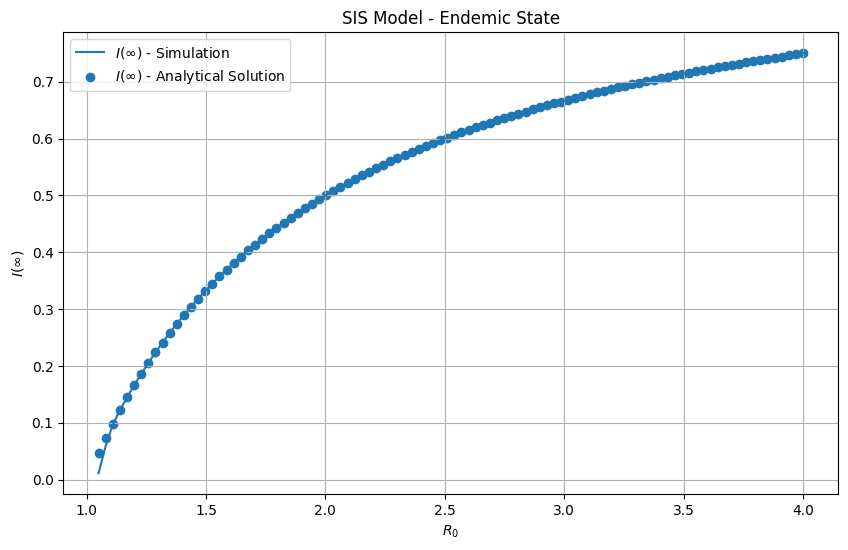

In [36]:
def equilibrium_SIS(beta, gamma, N): 
    return N * (1 - gamma / beta)

gamma = 0.1
N, I0 = 10**5, 10

I_inf, I_inf_analytical = [], []
R0s = np.linspace(1.05, 4, 100)
for R0 in R0s:
    beta = R0 * gamma
    S, I, steps = sis_model(beta=beta, gamma=gamma, N=N, I0=I0, T_final=1000, dt=0.1)
    I_inf.append(I[-1] / N)
    I_inf_analytical.append(equilibrium_SIS(beta=beta, gamma=gamma, N=N) / N)

# plot
plt.figure(figsize=(10, 6))
plt.plot(R0s, I_inf, label='$I(\\infty)$ - Simulation')
plt.scatter(R0s, I_inf_analytical, label='$I(\\infty)$ - Analytical Solution')

plt.xlabel('$R_0$')
plt.ylabel('$I(\\infty)$')
plt.title('SIS Model - Endemic State')
plt.legend()
plt.grid(True)
plt.show()

# SIR Model

The Susceptible-Infected-Recovered (SIR) model introduces a recovered compartment (R). Infected individuals can recover and gain immunity. The dynamics are governed by:

$$S + I \rightarrow_{\beta} 2I$$
$$I \rightarrow_{\gamma} R$$

Parameters:
- $\beta = 0.3$: Infection rate
- $\gamma = 0.1$: Recovery rate
- $N=10^5$: Total population size
- $I_0=10$: Initial number of infected individuals
- $T_{final}=100$: Simulation time
- $dt=0.05$: Time step

## Exploring the Effect of $R_0$ in the SIR Model

Let's investigate how the epidemic evolves for different values of the basic reproduction number $R_0 = \beta/\gamma$. We will simulate the SIR model for several representative $R_0$ values:

- **$R_0 < 1$:** The infection cannot invade the population and dies out quickly.
- **$R_0 = 1$:** The threshold case; the infection barely persists.
- **$R_0 > 1$:** The infection spreads and a significant fraction of the population is eventually infected and recovers.

We will visualize the time evolution of the compartments for each scenario.

In [37]:
def sir_model(beta, gamma, N, I0, T_final, dt=1):
    """
    Function to simulate the SIR model.

    Parameters:
        beta (float): Infection rate
        gamma (float): Recovery rate
        N (int): Total population size
        I0 (int): Initial number of infected individuals
        T_final (float): Final time to simulate

    Returns:
        S (array): Array of susceptible individuals over time
        I (array): Array of infected individuals over time
        R (array): Array of recovered individuals over time
        steps (array): Array of time steps over time
    """
    S, I, R = [N - I0], [I0], [0]
    steps = np.arange(0, T_final + dt, dt)
    for t in range(1, len(steps)):
        new_inf = beta * S[t-1] * I[t-1] / N * dt
        new_rec = gamma * I[t-1] * dt
        S.append(S[t-1] - new_inf)
        I.append(I[t-1] + new_inf - new_rec)
        R.append(R[t-1] + new_rec)

    return np.array(S), np.array(I), np.array(R), np.array(steps)


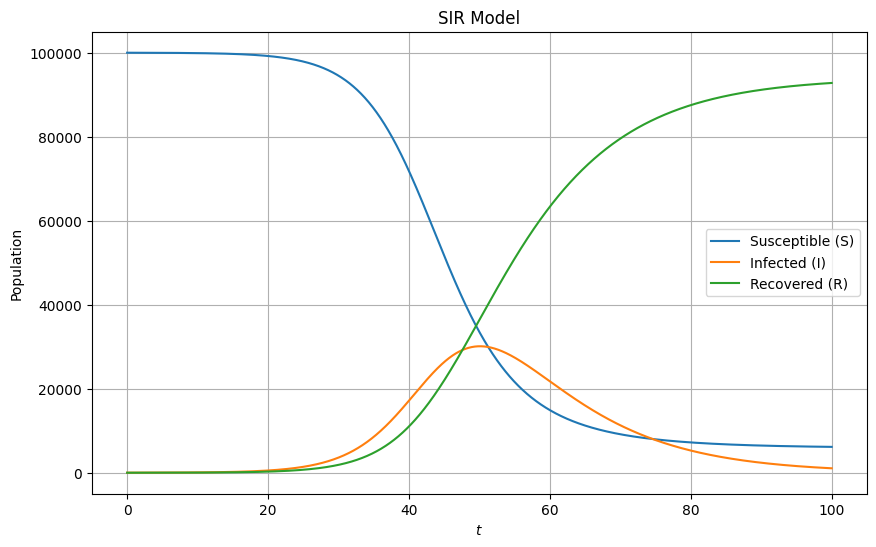

In [38]:
S, I, R, steps = sir_model(beta=0.3, gamma=0.1, N=10**5, I0=10, T_final=100, dt=0.05)

# plot
plt.figure(figsize=(10, 6))
plt.plot(steps, S, label='Susceptible (S)')
plt.plot(steps, I, label='Infected (I)')
plt.plot(steps, R, label='Recovered (R)')

plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

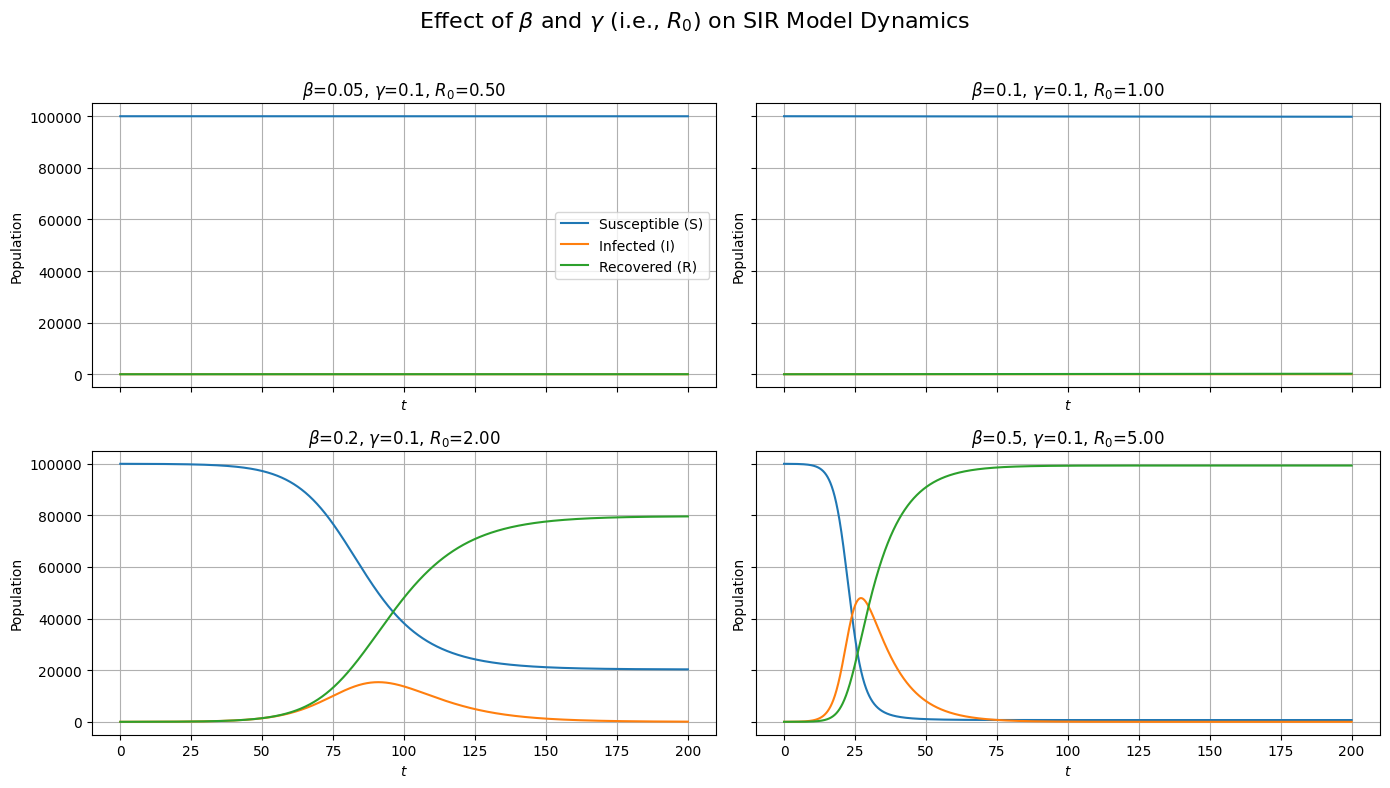

In [39]:
# Explore effect of R0 on SIR model dynamics
params = [
    (0.05, 0.1),   # R0 = 0.5, infection dies out
    (0.1, 0.1),    # R0 = 1, threshold case
    (0.2, 0.1),    # R0 = 2, epidemic spreads
    (0.5, 0.1),    # R0 = 5, strong epidemic
]
N, I0, T_final, dt = 10**5, 10, 200, 0.05

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
for i, (beta, gamma) in enumerate(params):
    S, I, R, steps = sir_model(beta=beta, gamma=gamma, N=N, I0=I0, T_final=T_final, dt=dt)
    ax = axes.flat[i]
    ax.plot(steps, S, label='Susceptible (S)')
    ax.plot(steps, I, label='Infected (I)')
    ax.plot(steps, R, label='Recovered (R)')
    ax.set_title(f"$\\beta$={beta}, $\\gamma$={gamma}, $R_0$={beta/gamma:.2f}")
    ax.set_xlabel('$t$')
    ax.set_ylabel('Population')
    ax.grid(True)
    if i == 0:
        ax.legend()

plt.suptitle('Effect of $\\beta$ and $\\gamma$ (i.e., $R_0$) on SIR Model Dynamics', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Exploring the Peak of the Epidemic in the SIR Model

The peak of the epidemic refers to the maximum number of infected individuals ($I_{\max}$) reached during the outbreak. This is a crucial quantity for public health planning, as it determines the maximum burden on healthcare systems.

Let's simulate the SIR model for different $R_0$ values and plot the peak infection as a function of $R_0$. We will also discuss how the peak changes with $R_0$ and what this means for epidemic control.

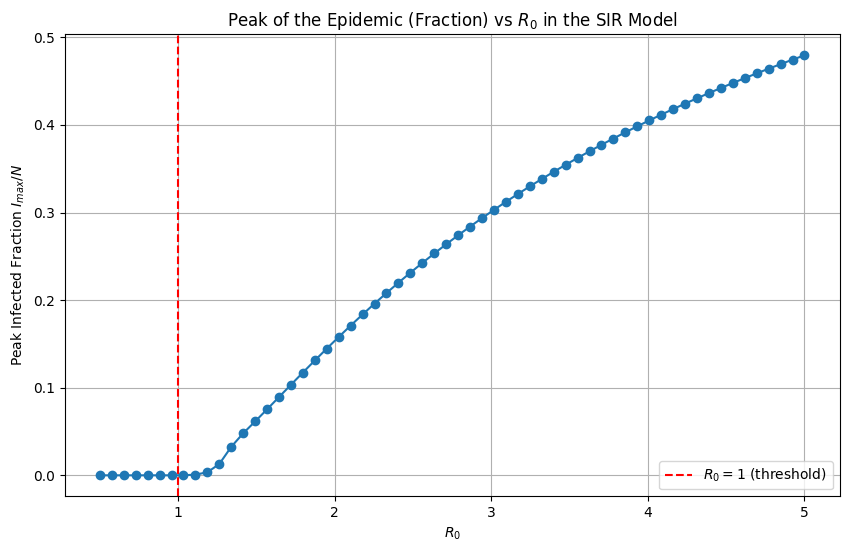

In [40]:
# Compute and plot the epidemic peak for different R0 values in the SIR model
gamma = 0.1
N, I0, T_final, dt = 10**5, 10, 200, 0.05
R0s = np.linspace(0.5, 5, 60)
I_peaks = []
for R0 in R0s:
    beta = R0 * gamma
    S, I, R, steps = sir_model(beta=beta, gamma=gamma, N=N, I0=I0, T_final=T_final, dt=dt)
    I_peaks.append(np.max(I) / N)  # fraction of population

plt.figure(figsize=(10, 6))
plt.plot(R0s, I_peaks, marker='o')
plt.axvline(x=1, color='r', linestyle='--', label='$R_0=1$ (threshold)')
plt.xlabel('$R_0$')
plt.ylabel('Peak Infected Fraction $I_{max}/N$')
plt.title('Peak of the Epidemic (Fraction) vs $R_0$ in the SIR Model')
plt.legend()
plt.grid(True)
plt.show()

### Discussion: How Does the Epidemic Peak Change with $R_0$?

- For $R_0 < 1$, the infection cannot invade the population, and the peak remains very low.
- As $R_0$ increases above 1, the peak number of infected individuals rises sharply.
- For large $R_0$, the peak can reach a significant fraction of the population.

This demonstrates the importance of reducing $R_0$ (e.g., via vaccination, social distancing, or increasing recovery rates) to keep the epidemic peak manageable and avoid overwhelming healthcare systems.

The location (time) and height of the peak are both critical for epidemic response planning.

### Visualizing the Timing of the Epidemic Peak

In addition to the height of the peak, the timing (when the peak occurs) is also important. Let's plot the time at which the peak occurs as a function of $R_0$.

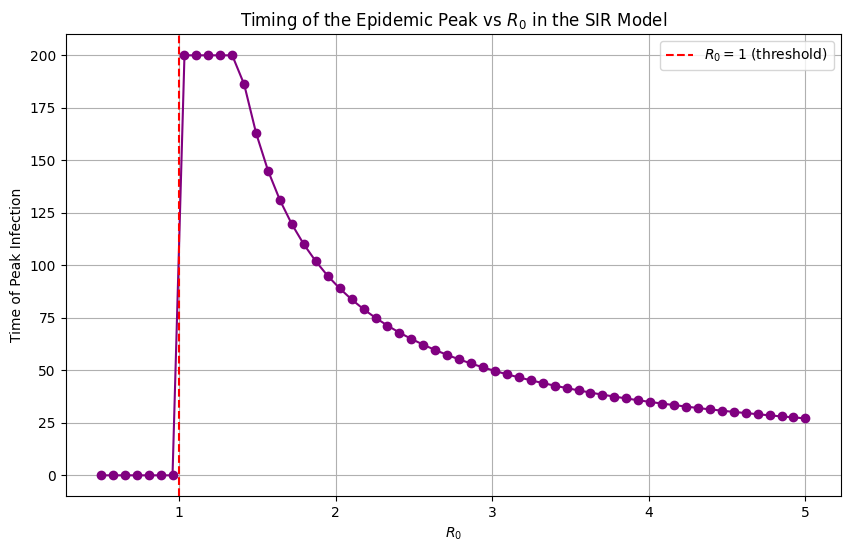

In [41]:
# Compute and plot the time of the epidemic peak for different R0 values
peak_times = []
for R0 in R0s:
    beta = R0 * gamma
    S, I, R, steps = sir_model(beta=beta, gamma=gamma, N=N, I0=I0, T_final=T_final, dt=dt)
    peak_idx = np.argmax(I)
    peak_times.append(steps[peak_idx])

plt.figure(figsize=(10, 6))
plt.plot(R0s, peak_times, marker='o', color='purple')
plt.axvline(x=1, color='r', linestyle='--', label='$R_0=1$ (threshold)')
plt.xlabel('$R_0$')
plt.ylabel('Time of Peak Infection')
plt.title('Timing of the Epidemic Peak vs $R_0$ in the SIR Model')
plt.legend()
plt.grid(True)
plt.show()

### Interpretation: Timing of the Epidemic Peak

- As $R_0$ increases, the epidemic peak occurs earlier.
- For $R_0$ just above 1, the epidemic grows slowly and peaks late.
- For large $R_0$, the epidemic spreads rapidly and peaks quickly.

This highlights the trade-off between the speed and size of an epidemic: higher $R_0$ leads to a faster and larger outbreak, while lower $R_0$ slows down and reduces the epidemic.

### Does the Epidemic Peak Depend Only on $R_0$ or Also on $\beta$ and $\gamma$ Separately?

The peak of the epidemic in the SIR model depends primarily on the basic reproduction number $R_0 = \\beta/\\gamma$, but not only on $R_0$. While $R_0$ determines whether an epidemic can take off and largely controls the *fraction* of the population infected at the peak, the **exact values** of $\beta$ (infection rate) and $\gamma$ (recovery rate) also matter:

- $R_0$ determines the *final size* and *relative peak* of the epidemic.
- The **absolute timing** of the epidemic (how fast it rises and falls) depends on both $\beta$ and $\gamma$ individually.
- For the same $R_0$, a higher $\gamma$ (and thus higher $\beta$) leads to a faster epidemic with a shorter duration, but the *fraction* of the population infected at the peak remains similar.
- For the same $R_0$, the *number* of infected at the peak (not just the fraction) will scale with the population size $N$.

**Summary:**  
- The *shape* and *fractional peak* of the epidemic are mostly determined by $R_0$.
- The *speed* and *duration* of the epidemic depend on the absolute values of $\beta$ and $\gamma$.